# Qiskit Basics & Single Qubit Quantum Gates

This is the first coding lecture in the course "Quantum Computing with Qiskit Ultimate Masterclass" on Udemy by Srinjoy Ganguly (Section 15). 
The course was last updated May 2022. qiskit has been updated since and the script shared by the author is not working anymore. This is a version running May 2024 (see qiskit version below). The script has been streamlined to avoid duplications.  

Learning goal: Learn qiskit basics and Single Qubit Quantum Gates

## Importing necessary libraries

In [38]:
import qiskit
import numpy as np
from qiskit_aer import Aer
from qiskit.providers.basic_provider import BasicProvider
from qiskit import QuantumCircuit,  ClassicalRegister, QuantumRegister, transpile#, execute, BasicAer
from qiskit.visualization import plot_bloch_multivector # Plotting the Bloch Sphere for Single Qubits
from qiskit.visualization import plot_histogram # 2D Histogram
from math import pi, sqrt # pi = 3.14 and square root operation
from qiskit.quantum_info import Operator 
from qiskit.visualization.array import array_to_latex # format matrices so that one can read them
from IPython.display import display, Math, Latex

print("qiskit version: "+qiskit.__version__)

qiskit version: 1.0.2


## Accessing Aer Backends List 

Quantum simulators available in the Aer package

In [2]:
Aer.backends() # Aer has C++ code in its backend

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

## Initializing a Quantum Circuit

Initialize a quantum circuit without any quantum gates.

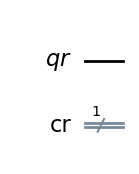

In [32]:
# Initializing quantum circuit
cr = ClassicalRegister(1, "cr") # single classical bit, names "cr"
qr = QuantumRegister(1,"qr") #Quantum Register with a single qubit
qc = QuantumCircuit(qr,cr) #Quantum Circuit
qc.draw('mpl') # draw with matplotlib backend

#### Basic Qiskit Information

- **All qubits in Qiskit starts from the state |0> by default**
- **Qiskit uses little endian ordering system for both classical bit and quantum bit ordering. This means that for 3 qubits $q_0$, $q_1$ & $q_2$, the qiskit ordering is reversed as $q_2$, $q_1$ & $q_0$. Same is for classical bits as well.**

## Pauli X Gate

The Pauli-X gate is a single-qubit rotation through π radians around the x-axis.
The Pauli-X gate is the quantum equivalent of the NOT gate for classical computers with respect to the standard basis |0⟩, |1⟩, which distinguishes the z axis on the Bloch sphere. It is sometimes called a bit-flip as it maps 
|0⟩ to |1⟩ and |1⟩ to |0⟩.

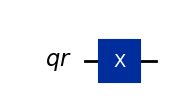

In [43]:
# X-gate on a |0> qubit
qr_x = QuantumRegister(1,"qr") #Quantum Register with a single qubit
qc_x = QuantumCircuit(qr_x) #Quantum Circuit
qc_x.x(qr_x[0]) # X Gate on 1st Qubit
#qc_x.save_statevector()
#qc_x.save_unitary()
qc_x.draw('mpl')

### Plotting the Bloch Sphere for Pauli X

See whether the circuit really worked or not on the qubit:

In [34]:
# function to plot a Block sphere after applying a quantum circuit
def plot_bloch_sphere(qc):
    backend = Aer.get_backend('statevector_simulator')
    # Execute the circuit
    result = transpile(qc, backend)
    job = backend.run(result) # runs the quantum circuit

    result = job.result().get_statevector(qc, decimals=3) # get result from the circuit

    # Printing the state after X gate
    print("\nQuantum state is:",result)

    # Plotting the Bloch Sphere
    return plot_bloch_multivector(result)


Quantum state is: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


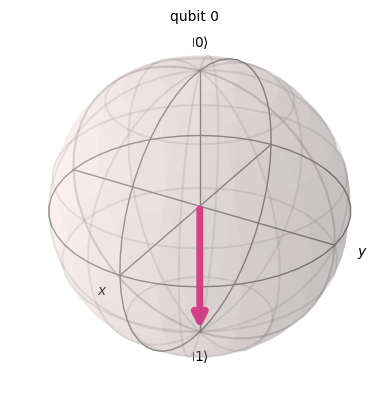

In [35]:
# Let's see the result
bloch = plot_bloch_sphere(qc_x)
bloch

==> The state of the 0 qubit is now 1, after we applied the flip by the Pauli X gate.

### Printing the Unitary Operator for Pauli X

A Unitary Operator for for Pauli X gate is a 2x2 matrix. This matrix describes how the Pauli-X gate acts on a single qubit. Specifically, it flips the state of the qubit, which is why it is often referred to as the "quantum NOT gate."  This property makes it a crucial gate in quantum computing, used in various quantum algorithms and quantum error correction.

In [40]:
# function to show the unitary operator of the quantum circuit
def show_unitary_operator(qc):
    # Set the Aer simulator as Unitary for Unitary Operator
    backend = Aer.get_backend('unitary_simulator')

    # Execute the circuit
    x_unitary = transpile(qc, backend)
    job = backend.run(x_unitary)
    print("This is the unitary operator for the gate:") 
    circuit = job.result().get_unitary(qc, decimals=3)
    display(array_to_latex(Operator(circuit)))


In [41]:
show_unitary_operator(qc_x)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

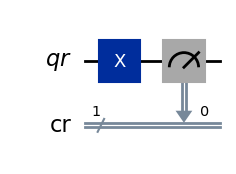

In [8]:
# X-gate on a |0> qubit and measurement
cr_x = ClassicalRegister(1, "cr")
qr_x = QuantumRegister(1, "qr") #Quantum Register with a single qubit
qc_x = QuantumCircuit(qr_x,cr_x) #Quantum Circuit
qc_x.x(qr[0]) # X Gate on 1st Qubit
qc_x.measure(0,0) # Measurement operation, we expect to measure 1 only
qc_x.draw('mpl')

### Running the Pauli X circuit using QASM Simulator

QASM Simulator emulates a perfect quantum hardware.

In [9]:
# function to run a quantum simulation
def run_simulation(qc):
    # Use Aer's qasm_simulator
    backend = Aer.get_backend('qasm_simulator')

    # Execute the circuit 1000 times on the qasm simulator
    result = backend.run(qc, shots=1000).result()

    # Returns counts
    counts = result.get_counts(qc)
    print("\nTotal counts are:",counts)
    return counts


Total counts are: {'1': 1000}


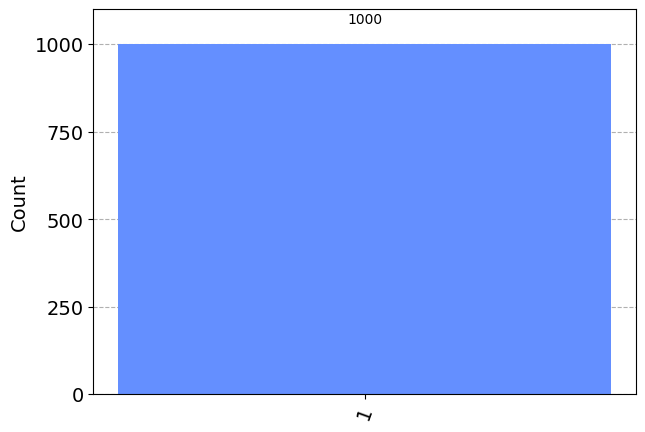

In [10]:
counts = run_simulation(qc_x)
# Plot a histogram
plot_histogram(counts)

"1" has been measured 1000 times. The probability to obtain "1" is 1=100%.

There are several ways to define quantum circuit initialization.

Way 1 explicit:

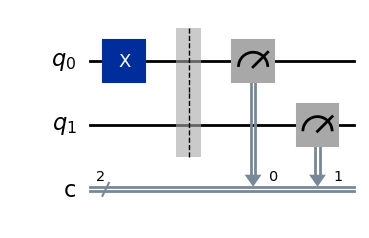

In [138]:
# X-gate on a |0> qubit and measurement with quantum circuit
qc_x = QuantumCircuit(2,2,name="qc") #Quantum Circuit; first is qr, second cr, containing 2 qubits and 2 classical bits.
qc_x.x(0) # X Gate on 1st Qubit
qc_x.barrier()
#qc_x.measure(0,0) # measure first qubit
#qc_x.measure(1,1) # measure 2nd qubit on the 2nd classical bit
qc_x.measure([0,1], [0,1]) # another way of defining in one line. First list refers to quantum bits, second list to classical bits
qc_x.draw('mpl')

Way 2 implicit:

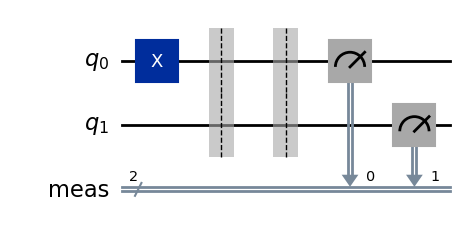

In [134]:
# X-gate on a |0> qubit and measurement with measure_all(). Here, no need to define classical bits, they are included automatically as maes
qc = QuantumCircuit(2,name="qc") #Quantum Circuit
qc.x(0) # X Gate on 1st Qubit
qc.measure_all() # automatically apply measurements to all qubits
qc.draw('mpl')

## Pauli Y Gate

The Pauli-Y gate is a single-qubit rotation through π radians around the y-axis. Pauli-Y maps |0⟩ to 𝑖|1⟩ and |1⟩ to −𝑖|0⟩. The Pauli-Y gate performs a specific kind of rotation on the Bloch sphere, effectively combining elements of both the Pauli-X and Pauli-Z 

- The Pauli-Y gate maps 0 to \(i|1\rangle\).
- The Pauli-Y gate maps 1 to \(-i|0\rangle\).

### Properties of the Pauli-Y Gate
- **Unitary:** Like all Pauli gates, the Pauli-Y gate is unitary. This means \(Y^\dagger Y = I\), where \(Y^\dagger\) is the conjugate transpose of \(Y\) and \(I\) is the identity matrix.
- **Hermitian:** The Pauli-Y gate is also Hermitian, meaning \(Y = Y^\dagger\). This implies that the gate is its own inverse up to a phase factor, which is an important property in quantum mechanics.
### Interpretation on the Bloch Sphere
On the Bloch sphere, the Pauli-Y gate corresponds to a 180-degree rotation around the Y-axis. This is distinct from the Pauli-X gate, which rotates around the X-axis, and the Pauli-Z gate, which rotates around the Z-axis. The combination of these rotations can describe any arbitrary single-qubit operation when combined with appropriate phase shifts.
### Quantum Circuit Representation
In quantum circuit diagrams, the Pauli-Y gate is often represented simply by a box labeled "Y". It is used in various quantum algorithms and operations where a specific type of qubit transformation is needed, especially those that require the combination of bit-flipping and phase-changing characteristics.

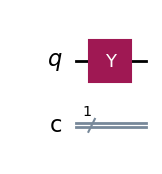

In [139]:
# Y-gate on a |0> qubit with quantum circuit
qc_y = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_y.y(0) # Y Gate on 1st Qubit
qc_y.draw('mpl')

### Plotting the Bloch Sphere for Pauli Y Gate


Quantum state is: Statevector([0.-0.j, 0.+1.j],
            dims=(2,))


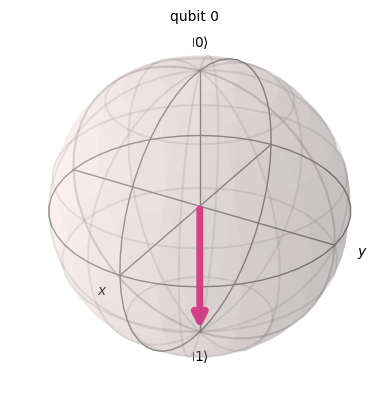

In [140]:
# Let's see the result
bloch = plot_bloch_sphere(qc_y)
bloch

### Printing the Unitary Operator for Pauli Y

In [141]:
show_unitary_operator(qc_y)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

Each element of the matrix is a complex number. In Python, complex numbers are represented with a real part and an imaginary part, where `j` denotes the imaginary unit (equivalent to \(i\) in standard mathematical notation).
- For example, `0 - 1j` represents the complex number \(0 - i\).

2. **Matrix Structure**:
- The matrix has the following structure:
\[
\begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}
\]
3. **Pauli-Y Matrix**:
- This specific matrix is the representation of the Pauli-Y gate in quantum computing. The Pauli-Y matrix is:
\[
Y = \begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}
\]

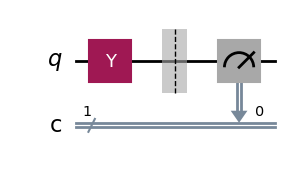

In [16]:
# Y-gate on a |0> qubit and measurement with quantum circuit
qc_y = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_y.y(0) # Y Gate on 1st Qubit
qc_y.barrier()
qc_y.measure(0,0)
qc_y.draw('mpl')

### Running the Pauli Y circuit using QASM Simulator


Total counts are: {'1': 1000}


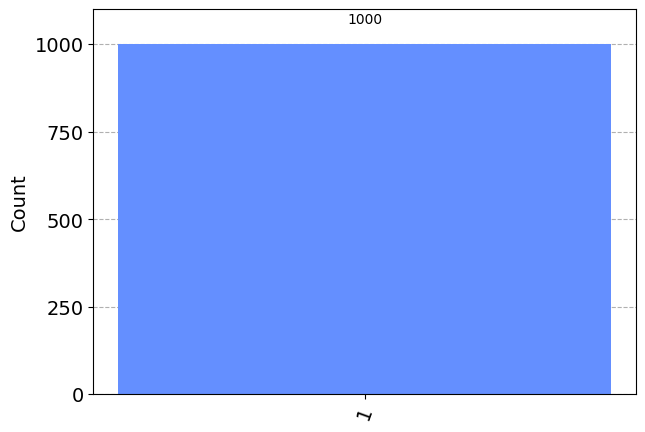

In [17]:
counts = run_simulation(qc_y)
# Plot a histogram
plot_histogram(counts)

## Pauli Z Gate

The Pauli-Z gate is a single-qubit rotation through π radians around the z-axis. Pauli Z leaves the basis state |0⟩ unchanged and maps 
|1⟩ to −|1⟩.

Therefore, when applied to 0, nothing changes, but when applied to 1, you get -1.

The Pauli-Z gate is one of the fundamental single-qubit gates in quantum computing, represented by one of the Pauli matrices. It is defined by the following 2x2 matrix:

1 & 0 \\
0 & -1
\end{pmatrix} \]
### Action on Quantum States
The Pauli-Z gate acts on the basis states \(|0\rangle\) and \(|1\rangle\) as follows:
1. **When applied to \(|0\rangle\):**
\[ Z|0\rangle = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
\begin{pmatrix}
1 \\
0
\end{pmatrix} =
\begin{pmatrix}
1 \\
0
\end{pmatrix} = |0\rangle \]
2. **When applied to \(|1\rangle\):**
\[ Z|1\rangle = \begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}
\begin{pmatrix}
0 \\
1
\end{pmatrix} =
\begin{pmatrix}
0 \\
-1
\end{pmatrix} = -|1\rangle \]
### Summary of Effects
- The Pauli-Z gate leaves the \(|0\rangle\) state unchanged.
- The Pauli-Z gate flips the sign of the \(|1\rangle\) state, effectively transforming \(|1\rangle\) into \(-|1\rangle\).
### Properties of the Pauli-Z Gate
- **Unitary:** The Pauli-Z gate is unitary, meaning \(Z^\dagger Z = I\), where \(Z^\dagger\) is the conjugate transpose of \(Z\) and \(I\) is the identity matrix.
- **Hermitian:** The Pauli-Z gate is also Hermitian, meaning \(Z = Z^\dagger\). This implies that the gate is its own inverse: \(Z^2 = I\).
### Interpretation on the Bloch Sphere
On the Bloch sphere, the Pauli-Z gate corresponds to a 180-degree rotation around the Z-axis. This rotation leaves the north and south poles (\(|0\rangle\) and \(|1\rangle\)) unchanged in position but flips the phase of states in the equatorial plane.
### Quantum Circuit Representation
In quantum circuit diagrams, the Pauli-Z gate is represented by a box labeled "Z" or sometimes simply as "Z" without a box. It is used in various quantum algorithms and operations where phase flipping or Z-axis rotations are required.
### Usage in Quantum Computing
The Pauli-Z gate is crucial in many quantum algorithms and serves as a basic building block for more complex quantum operations. It is often combined with other gates to perform intricate quantum state manipulations and transformations.

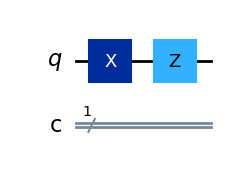

In [47]:
# Z-gate on a |0> qubit with quantum circuit
qc_z = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_z.x(0) # first apply x-Gate to transform 0 to 1, otherwise, there will be no effect visible
qc_z.z(0) # Z Gate on 1st Qubit
qc_z.draw('mpl')

### Plotting the Bloch Sphere for Pauli Z Gate


Quantum state is: Statevector([ 0.+0.j, -1.+0.j],
            dims=(2,))


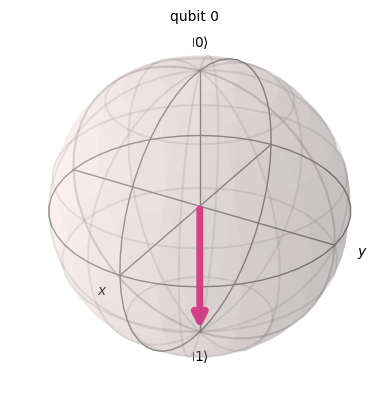

In [48]:
# Let's see the result
bloch = plot_bloch_sphere(qc_z)
bloch

### Printing the Unitary Operator for Pauli Z

In [49]:
show_unitary_operator(qc_z)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

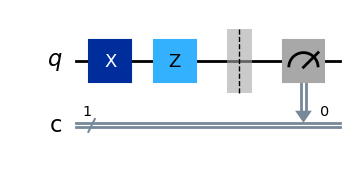

In [50]:
# Z-gate on a |0> qubit with quantum circuit
qc_z = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_z.x(0)
qc_z.z(0) # Z Gate on 1st Qubit
qc_z.barrier()
qc_z.measure(0,0)
qc_z.draw('mpl')

### Running the Pauli Z Circuit using the QASM Simulator


Total counts are: {'1': 1000}


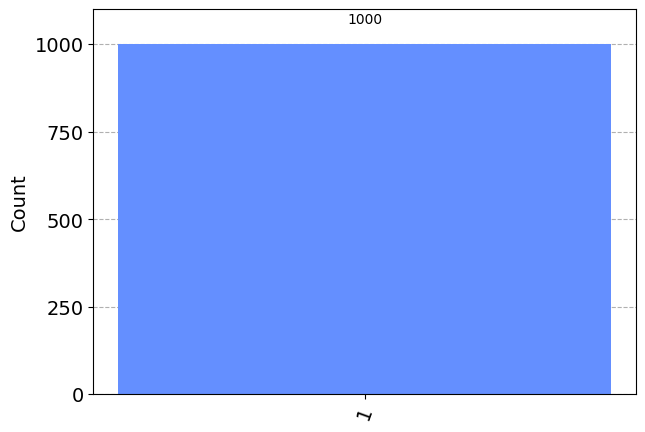

In [51]:
counts = run_simulation(qc_z)
# Plot a histogram
plot_histogram(counts)

## Hadamard Gate

The Hadamard gate is a single-qubit operation that maps the basis state ∣0⟩ to (∣0⟩+∣1⟩)/sqrt(2) and (∣0⟩-∣1⟩)/sqrt(2), thus creating an equal superposition of the two basis states.

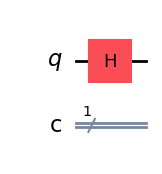

In [52]:
# H-gate on a |0> qubit with quantum circuit
qc_h = QuantumCircuit(1,1,name="qc") #Quantum Circuit
#qc_h.x(0)
qc_h.h(0) # H Gate on 1st Qubit
qc_h.draw('mpl')

### Plotting the Bloch Sphere for Hadamard Gate


Quantum state is: Statevector([0.707+0.j, 0.707+0.j],
            dims=(2,))


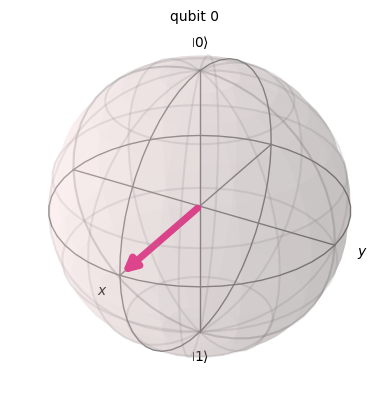

In [53]:
# Let's see the result
bloch = plot_bloch_sphere(qc_h)
bloch

### Printing the Unitary Operator for Hadamard Gate

In [54]:
show_unitary_operator(qc_h)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

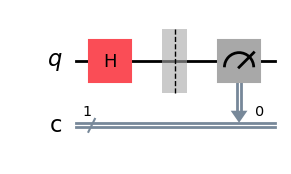

In [55]:
# H-gate on a |0> qubit with quantum circuit
qc_h = QuantumCircuit(1,1,name="qc") #Quantum Circuit
#qc_h.x(0)
qc_h.h(0) # H Gate on 1st Qubit
qc_h.barrier()
qc_h.measure(0,0)
qc_h.draw('mpl')

### Running the Hadamard Circuit using the QASM Simulator


Total counts are: {'1': 509, '0': 491}


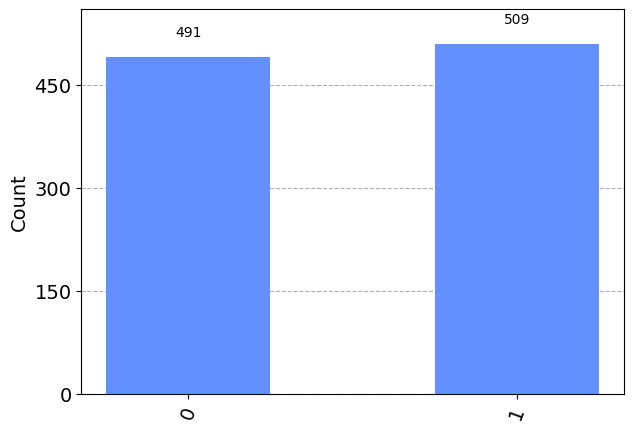

In [28]:
counts = run_simulation(qc_h)
# Plot a histogram
plot_histogram(counts)

## S Gate

The Phase gate (or S gate) is a single-qubit operation.

The S gate is also known as the phase gate or the Z90 gate, because it represents a 90-degree rotation around the z-axis.

The S gate, also known as the phase gate or the 
𝜋/2
​
  gate, is a single-qubit gate used in quantum computing. Its unitary operator is represented by the following 2x2 matrix:

1 & 0 \\
0 & i
\end{pmatrix} \]
### Explanation of the Matrix
- The element \(1\) at position (0,0) leaves the \(|0\rangle\) state unchanged.
- The element \(i\) at position (1,1) multiplies the \(|1\rangle\) state by \(i\), where \(i\) is the imaginary unit (i.e., \(i^2 = -1\)).
### Action on Quantum States
Let's see how the S gate acts on the basis states \(|0\rangle\) and \(|1\rangle\):
1. **When applied to \(|0\rangle\):**
\[ S|0\rangle = \begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}
\begin{pmatrix}
1 \\
0
\end{pmatrix} =
\begin{pmatrix}
1 \\
0
\end{pmatrix} = |0\rangle \]
2. **When applied to \(|1\rangle\):**
\[ S|1\rangle = \begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}
\begin{pmatrix}
0 \\
1
\end{pmatrix} =
\begin{pmatrix}
0 \\
i
\end{pmatrix} = i|1\rangle \]
### Summary of Effects
- The S gate leaves the \(|0\rangle\) state unchanged.
- The S gate multiplies the \(|1\rangle\) state by \(i\), introducing a phase shift of \(\frac{\pi}{2}\).
### Properties of the S Gate
- **Unitary:** The S gate is unitary, meaning \(S^\dagger S = I\), where \(S^\dagger\) is the conjugate transpose of \(S\) and \(I\) is the identity matrix.
- **Not Hermitian:** The S gate is not Hermitian since \(S \neq S^\dagger\). However, its square is the Z gate: \(S^2 = Z\).
### Interpretation on the Bloch Sphere
On the Bloch sphere, the S gate performs a phase shift around the Z-axis by \(\frac{\pi}{2}\) radians. This changes the relative phase between the \(|0\rangle\) and \(|1\rangle\) components of a qubit.
### Quantum Circuit Representation
In quantum circuit diagrams, the S gate is represented by a box labeled "S". It is often used in various quantum algorithms and operations where precise phase adjustments are required.
### Summary
The unitary operator for the S gate is:
\[ S = \begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix} \]
This gate introduces a phase shift of \(\frac{\pi}{2}\) to the \(|1\rangle\) state while leaving the \(|0\rangle\) state unchanged, playing a crucial role in phase manipulation in quantum computing.

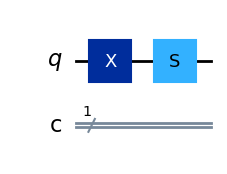

In [56]:
# S-gate on a |0> qubit with quantum circuit
qc_s = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_s.x(0) # transform 0 to 1
qc_s.s(0) # S Gate on 1st Qubit
qc_s.draw('mpl')

### Plotting the Bloch Sphere for S Gate


Quantum state is: Statevector([0.+0.j, 0.+1.j],
            dims=(2,))


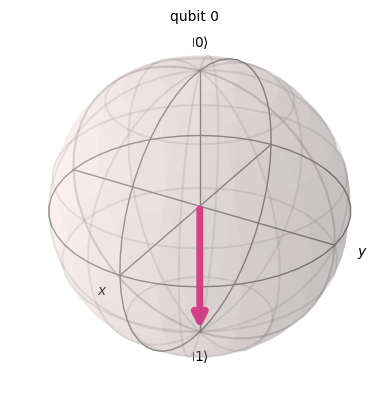

In [57]:
# Let's see the result
bloch = plot_bloch_sphere(qc_s)
bloch

### Printing the Unitary Operator for S Gate

In [58]:
show_unitary_operator(qc_s)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

## S Dagger Gate

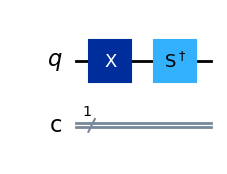

In [59]:
# S Dagger-gate on a |0> qubit with quantum circuit
qc_sdg = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_sdg.x(0)
qc_sdg.sdg(0) # S Dagger Gate on 1st Qubit
qc_sdg.draw('mpl')

### Plotting the Bloch Sphere for S Dagger Gate


Quantum state is: Statevector([0.+0.j, 0.-1.j],
            dims=(2,))


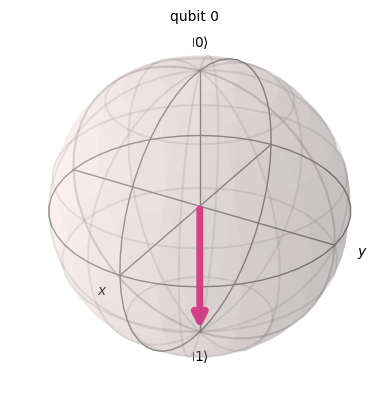

In [60]:
# Let's see the result
bloch = plot_bloch_sphere(qc_sdg)
bloch

### Printing the Unitary Operator for S Dagger Gate

In [61]:
show_unitary_operator(qc_sdg)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

## T Gate

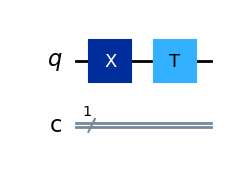

In [62]:
# T-gate on a |0> qubit with quantum circuit
qc_t = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_t.x(0)
qc_t.t(0) # T Gate on 1st Qubit
qc_t.draw('mpl')

### Plotting the Bloch Sphere for T Gate


Quantum state is: Statevector([0.   +0.j   , 0.707+0.707j],
            dims=(2,))


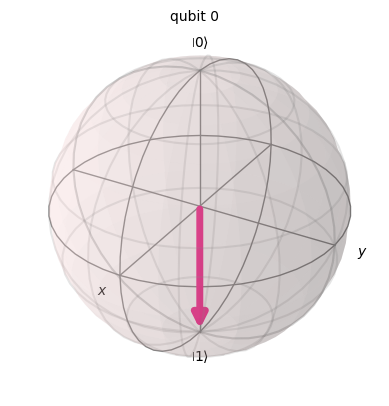

In [63]:
bloch = plot_bloch_sphere(qc_t)
bloch

### Printing the Unitary Operator for T Gate

In [64]:
show_unitary_operator(qc_t)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

## T Dagger Gate

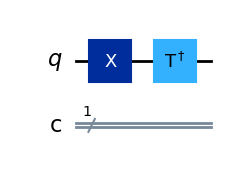

In [65]:
# T Dagger-gate on a |0> qubit with quantum circuit
qc_tdg = QuantumCircuit(1,1,name="qc") #Quantum Circuit
qc_tdg.x(0)
qc_tdg.tdg(0) # T Dagger Gate on 1st Qubit
qc_tdg.draw('mpl')

### Plotting the Bloch Sphere for T Dagger Gate


Quantum state is: Statevector([0.   +0.j   , 0.707-0.707j],
            dims=(2,))


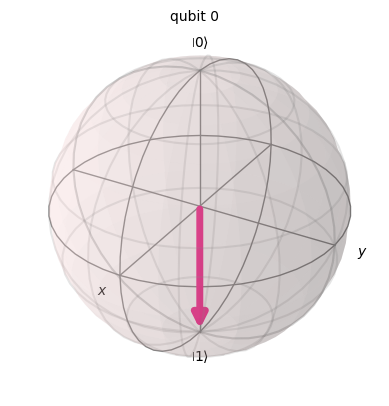

In [66]:
bloch = plot_bloch_sphere(qc_tdg)
bloch

### Printing the Unitary Operator for T Dagger Gate

In [67]:
show_unitary_operator(qc_tdg)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

## Rx Gate

Rotation gate around X-achsis, parametarized by theta

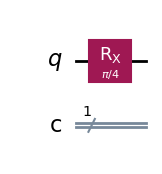

In [104]:
# RX Gate
theta_x = 0.25*pi # experiment with changing theta and see the changes on Bloch sphere and the unitary operator
qc_rx = QuantumCircuit(1,1,name="qc")
qc_rx.rx(theta_x,0)
qc_rx.draw(output='mpl')

### Plotting the Bloch Sphere for Rx Gate


Quantum state is: Statevector([0.924+0.j   , 0.   -0.383j],
            dims=(2,))


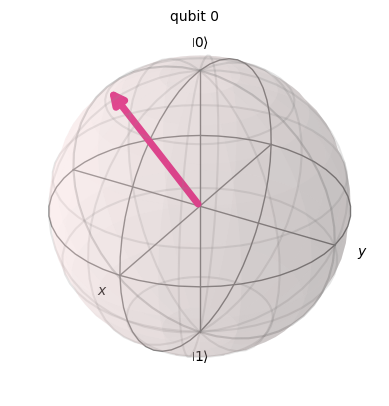

In [105]:
bloch = plot_bloch_sphere(qc_rx)
bloch

### Printing the Unitary Operator for Rx Gate. Watch out, the operator also changes with changes of theta!

In [106]:
show_unitary_operator(qc_rx)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

## Ry Gate

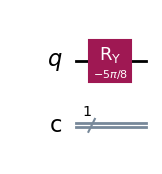

In [107]:
# RY Gate
theta_y = -5*pi/8
qc_ry = QuantumCircuit(1,1,name="qc")
qc_ry.ry(theta_y,0)
qc_ry.draw(output='mpl')

### Plotting the Bloch Sphere for Ry Gate


Quantum state is: Statevector([ 0.556+0.j, -0.831+0.j],
            dims=(2,))


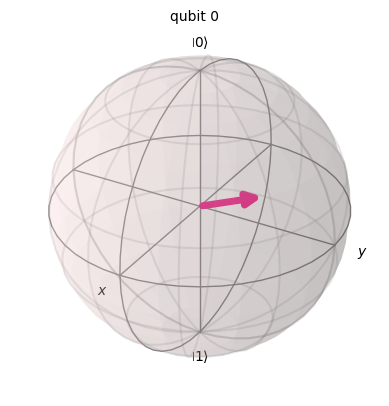

In [108]:
bloch = plot_bloch_sphere(qc_ry)
bloch

### Printing the Unitary Operator for Ry Gate

In [109]:
show_unitary_operator(qc_ry)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

## Rz Gate

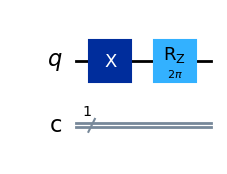

In [131]:
# RZ Gate
theta_z = 2*pi
qc_rz = QuantumCircuit(1,1,name="qc")
qc_rz.x(0)
qc_rz.rz(theta_z,0)
qc_rz.draw(output='mpl')

### Plotting the Bloch Sphere for Rz Gate


Quantum state is: Statevector([ 0.-0.j, -1.+0.j],
            dims=(2,))


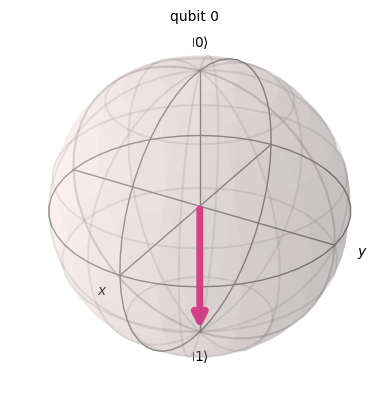

In [132]:
bloch = plot_bloch_sphere(qc_rz)
bloch

### Printing the Unitary Operator for Rz Gate

In [133]:
show_unitary_operator(qc_rz)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

## U Gate or U3 Gate

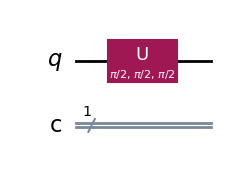

In [77]:
# U Gate or U3 Gate
qc_u = QuantumCircuit(1, 1, name="qc")
qc_u.u(pi/2,pi/2,pi/2,0)
qc_u.draw('mpl')

### Plotting the Bloch Sphere for U Gate


Quantum state is: Statevector([0.707+0.j   , 0.   +0.707j],
            dims=(2,))


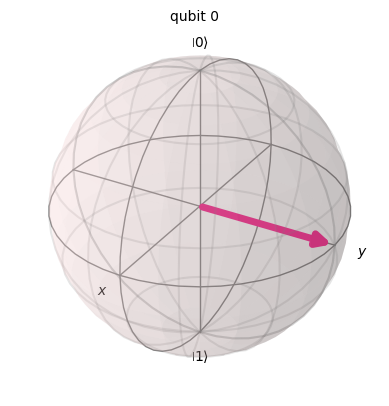

In [78]:
bloch = plot_bloch_sphere(qc_u)
bloch

### Printing the Unitary Operator for U Gate

In [79]:
show_unitary_operator(qc_u)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

## U2 Gate - First Angle of U Gate = pi/2 fixed

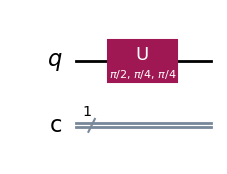

In [80]:
# U2 Gate
qc_u2 = QuantumCircuit(1, 1, name="qc")
qc_u2.u(pi/2,pi/4,pi/4,0)
qc_u2.draw('mpl')

### Plotting the Bloch Sphere for U2 Gate


Quantum state is: Statevector([0.707+0.j , 0.5  +0.5j],
            dims=(2,))


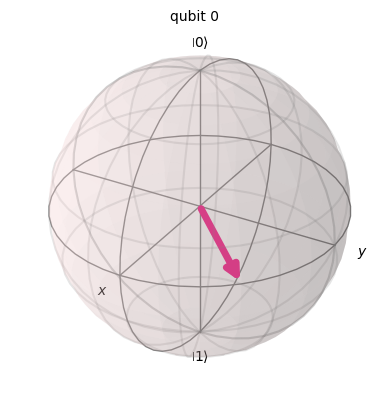

In [81]:
bloch = plot_bloch_sphere(qc_u2)
bloch

### Printing the Unitary Operator for U2 Gate

In [82]:
show_unitary_operator(qc_u2)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>

## U1 Gate = P Gate (Phase Gate)

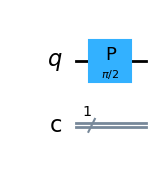

In [83]:
# U1 Gate = P Gate
qc_u1 = QuantumCircuit(1, 1, name="qc")
qc_u1.p(pi/2,0)
qc_u1.draw('mpl')

### Plotting the Bloch Sphere for U1 or P Gate


Quantum state is: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


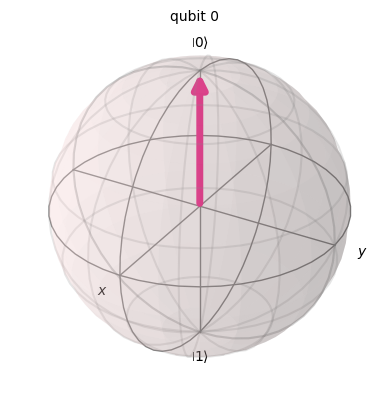

In [84]:
bloch = plot_bloch_sphere(qc_u1)
bloch

### Printing the Unitary Operator for U1 or P Gate

In [85]:
show_unitary_operator(qc_u1)

This is the unitary operator for the gate:


<IPython.core.display.Latex object>